In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
stats= pd.read_csv('data/combined_stats.csv')
stats.columns


Index(['Player', 'Age', 'Abbreviation', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Year', 'voting_first', 'voting_pts_won', 'voting_pts_max',
       'voting_share', 'advanced_ws', 'advanced_ws_per_48', 'Team', 'W', 'L',
       'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

# average mvp candidates stats over the years

In [11]:
candidates_stats=stats[stats['voting_pts_won']>0].groupby('Year').agg({'PTS':'mean', 'AST':'mean', 'STL':'mean','FTA':'mean','3PA':'mean'}).copy()
candidates_stats

,PTS,AST,STL,FTA,3PA
Year,,,,,
1990,23.650000,5.535714,1.657143,7.128571,1.235714
1991,22.150000,6.050000,1.615000,6.335000,1.510000
1992,21.429412,5.700000,1.611765,5.976471,1.611765
1993,23.350000,4.621429,1.464286,7.085714,1.700000
1994,20.664706,5.100000,1.694118,6.047059,1.594118
1995,21.673333,4.853333,1.673333,6.400000,2.026667
1996,21.082353,4.929412,1.505882,6.829412,2.011765
1997,21.620000,5.040000,1.430000,6.520000,2.740000
1998,20.589474,4.857895,1.368421,6.200000,2.184211


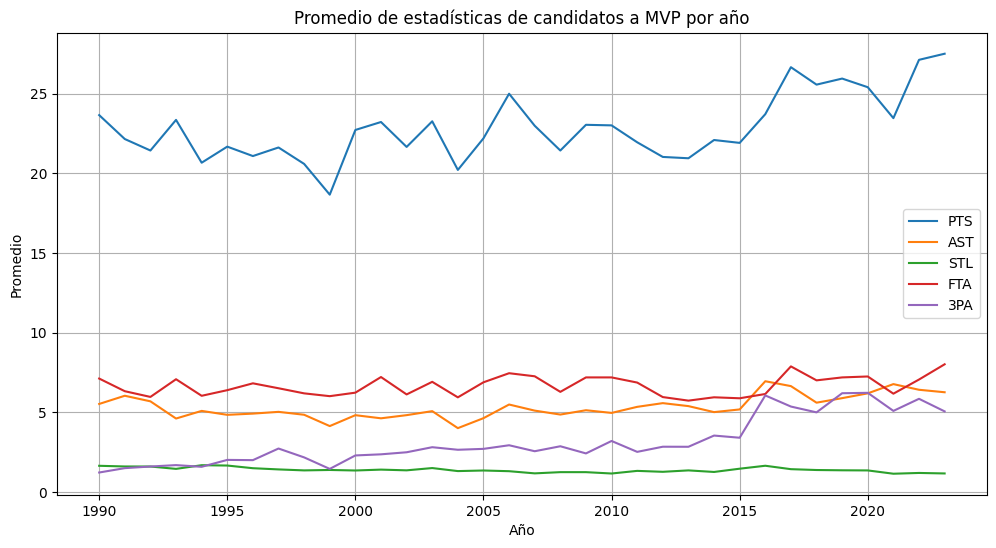

In [ ]:

plt.figure(figsize=(12, 6))

for columna in candidates_stats.columns:
    sns.lineplot(x=candidates_stats.index, y=candidates_stats[columna], label=columna)

plt.title('Average statistics of MVP candidates over the years')
plt.xlabel('year')
plt.ylabel('mean')
plt.legend()
plt.grid(True)
plt.show()


# best scores with >60 games

In [21]:
best_scorers = stats[stats['G'] > 60].sort_values('PTS', ascending=False).groupby('Year').first().reset_index()
best_scorers


,Year,Player,Age,Abbreviation,Pos,G,GS,MP,FG,FGA,...,advanced_ws,advanced_ws_per_48,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,1990,Michael Jordan,26.0,CHI,SG,82.0,82.0,39.0,12.6,24.0,...,19.0,0.285,Chicago Bulls,55.0,27.0,0.671,4.0,109.5,106.2,2.74
1,1991,Michael Jordan,27.0,CHI,SG,82.0,82.0,37.0,12.1,22.4,...,20.3,0.321,Chicago Bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
2,1992,Michael Jordan,28.0,CHI,SG,80.0,80.0,38.8,11.8,22.7,...,17.7,0.274,Chicago Bulls,67.0,15.0,0.817,0.0,109.9,99.5,10.07
3,1993,Michael Jordan,29.0,CHI,SG,78.0,78.0,39.3,12.7,25.7,...,17.2,0.270,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
4,1994,David Robinson,28.0,SAS,C,80.0,80.0,40.5,10.5,20.7,...,20.0,0.296,San Antonio Spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05
5,1995,Shaquille O'Neal,22.0,ORL,C,79.0,79.0,37.0,11.8,20.2,...,14.0,0.230,Orlando Magic,57.0,25.0,0.695,0.0,110.9,103.8,6.44
6,1996,Michael Jordan,32.0,CHI,SG,82.0,82.0,37.7,11.2,22.6,...,20.4,0.317,Chicago Bulls,72.0,10.0,0.878,0.0,105.2,92.9,11.80
7,1997,Michael Jordan,33.0,CHI,SG,82.0,82.0,37.9,11.2,23.1,...,18.3,0.283,Chicago Bulls,69.0,13.0,0.841,0.0,103.1,92.3,10.70
8,1998,Michael Jordan,34.0,CHI,SG,82.0,82.0,38.8,10.7,23.1,...,15.8,0.238,Chicago Bulls,62.0,20.0,0.756,0.0,96.7,89.6,7.24
9,2000,Shaquille O'Neal,27.0,LAL,C,79.0,79.0,40.0,12.1,21.1,...,18.6,0.283,Los Angeles Lakers,67.0,15.0,0.817,0.0,100.8,92.3,8.41


<Axes: xlabel='Player'>

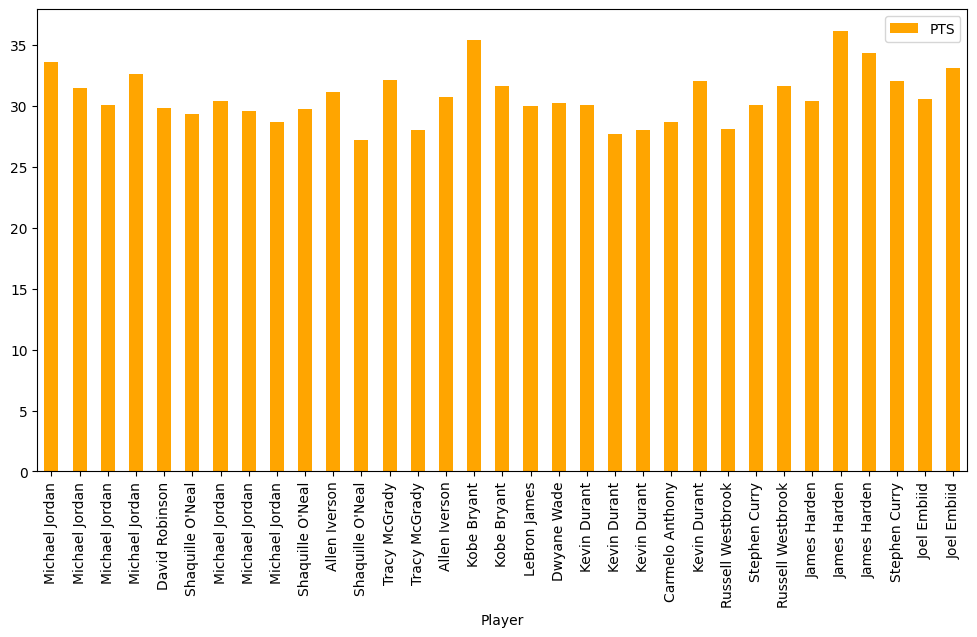

In [22]:
best_scorers.plot(x='Player', y='PTS', kind='bar', figsize=(12, 6), color='orange')

# corr between share for mvp and main stats

In [23]:
share_corr= stats[stats['voting_pts_won']>0][['PTS', 'AST', 'STL', 'TRB', 'voting_share']].corr()
share_corr

,PTS,AST,STL,TRB,voting_share
PTS,1.000000,-0.068109,0.085620,0.064697,0.432888
AST,-0.068109,1.000000,0.472549,-0.518651,0.086833
STL,0.085620,0.472549,1.000000,-0.319525,0.091092
TRB,0.064697,-0.518651,-0.319525,1.000000,0.199529
voting_share,0.432888,0.086833,0.091092,0.199529,1.000000


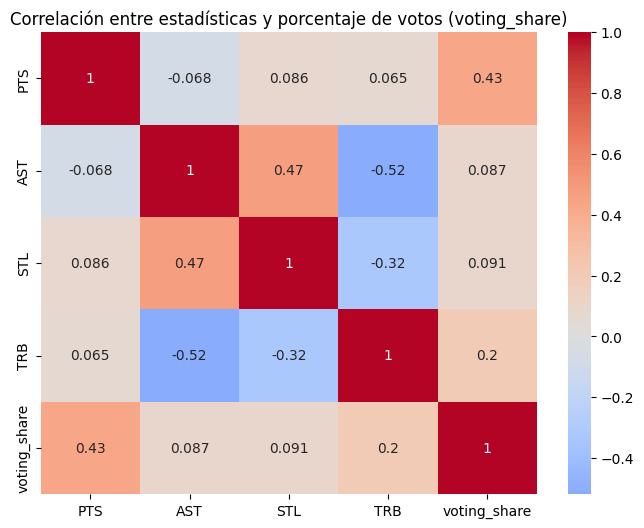

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(share_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between statistics and voting share')
plt.show()

# best denfensive seasons using stl and blocks

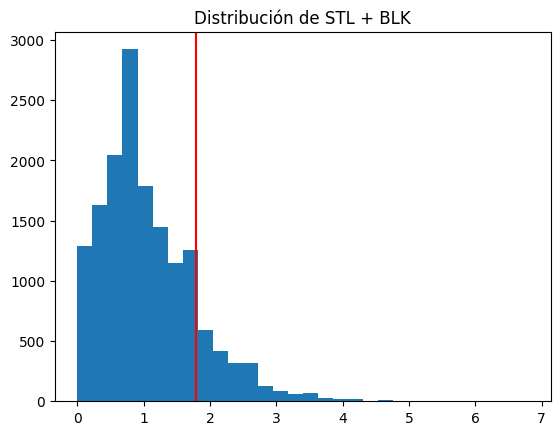

,Player,Year,STL,BLK,STL_BLK,TRB,PF
3563,David Robinson,1992,2.3,4.5,6.8,12.2,3.2
5806,Hakeem Olajuwon,1990,2.1,4.6,6.7,14.0,3.8
5808,Hakeem Olajuwon,1992,1.8,4.3,6.1,12.1,3.8
5807,Hakeem Olajuwon,1991,2.2,3.9,6.1,13.8,3.9
5809,Hakeem Olajuwon,1993,1.8,4.2,6.0,13.0,3.7
3561,David Robinson,1990,1.7,3.9,5.6,12.0,3.2
3562,David Robinson,1991,1.5,3.9,5.4,13.0,3.2
5810,Hakeem Olajuwon,1994,1.6,3.7,5.3,11.9,3.6
5811,Hakeem Olajuwon,1995,1.8,3.4,5.2,10.8,3.5
1198,Ben Wallace,2002,1.7,3.5,5.2,13.0,2.2


In [ ]:


stats['STL_BLK'] = stats['STL'] + stats['BLK']


mean = stats['STL_BLK'].mean()
std = stats['STL_BLK'].std()
threshold = mean + std

best_defensives = stats[stats['STL_BLK'] > threshold].sort_values('STL_BLK', ascending=False).head(20)

plt.hist(stats['STL_BLK'], bins=30)
plt.axvline(threshold, color='red', label='Umbral (media + 1σ)')
plt.title('Distribución de STL + BLK')
plt.show()

best_defensives[['Player', 'Year', 'STL', 'BLK', 'STL_BLK', 'TRB', 'PF']]